In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('uniq cls:', np.unique(y))

uniq cls: [0 1 2]


### 데이터셋 분할
* test_size: 전체 데이터 중 테스트셋 비율
* 분할 전 데이터 셔플
* random_state: 셔플 난수
* stratify: 계층화 기능. 훈련셋, 테스트셋의 클래스 레이블 비율을 전체 데이터셋과 동일하게 맞춘다.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1, stratify=y)

In [4]:
print('전체 데이터셋 레이블 카운트:', np.bincount(y))
print('훈련셋 레이블 카운트:', np.bincount(y_train))
print('테스트셋 레이블 카운트:', np.bincount(y_test))

전체 데이터셋 레이블 카운트: [50 50 50]
훈련셋 레이블 카운트: [35 35 35]
테스트셋 레이블 카운트: [15 15 15]


### 특성 스케일링

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
print(f'훈련셋 평균/표준편차: {X_train_std.mean():.4f}/{X_train_std.std():.4f}')
print(f'테스트셋 평균/표준편차: {X_test_std.mean():.4f}/{X_test_std.std():.4f}')

훈련셋 평균/표준편차: 0.0000/1.0000
테스트셋 평균/표준편차: -0.0245/0.9616


### 퍼셉트론

In [8]:
from sklearn.linear_model import Perceptron

In [9]:
ppn = Perceptron(max_iter=40, eta0=.1, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
from tools import plot_decision_regions

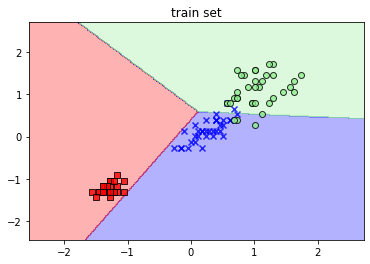

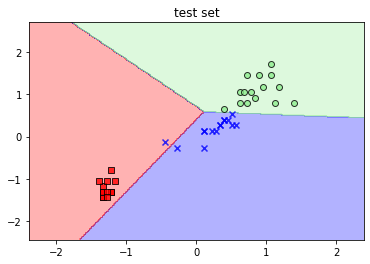

In [11]:
plot_decision_regions(X_train_std, y_train, ppn.predict, title='train set')
plot_decision_regions(X_test_std, y_test, ppn.predict, title='test set')

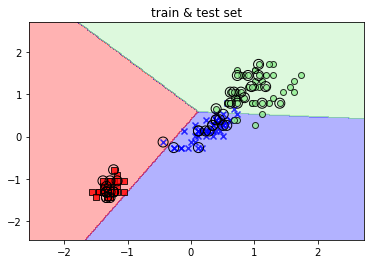

In [12]:
plot_decision_regions(np.vstack([X_train_std, X_test_std]),
                      np.concatenate([y_train, y_test]),
                      ppn.predict,
                      test_idx=range(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
                      title='train & test set')

In [13]:
y_pred = ppn.predict(X_test_std)
error = (y_pred!=y_test).sum()
print(f'errors: {error}')
print(f'accuracy: {1 - error / y_test.shape[0]:.4f}')

errors: 1
accuracy: 0.9778


In [14]:
from sklearn.metrics import accuracy_score

In [15]:
print(f'accuracy: {accuracy_score(y_test, y_pred):.4f}')

accuracy: 0.9778


In [16]:
print(f'accuracy: {ppn.score(X_test_std, y_test):.4f}')

accuracy: 0.9778
